In [73]:
import librosa
import util
from scipy.io.wavfile import read as wavread
import matplotlib.pyplot as plt
import numpy as np
from pyACA import computePitch

In [19]:
path = 'voice.wav'
audio, sr = librosa.load(path, sr=44100)

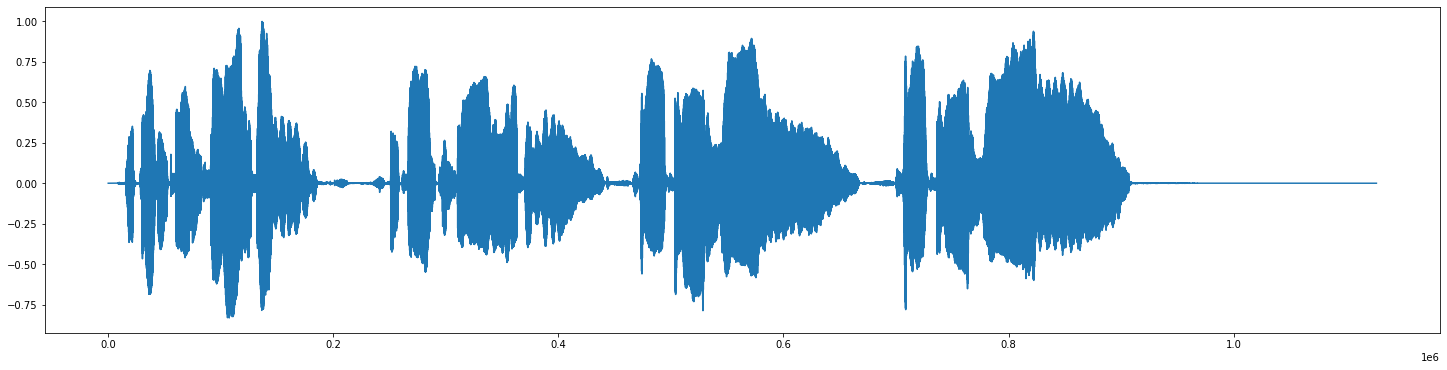

In [20]:
plt.figure(figsize = (25, 6))
plt.plot(audio)

In [74]:
#    'SpectralAcf',
#    'SpectralHps',
#    'TimeAcf',
#    'TimeAmdf',
#    'TimeAuditory',
#    'TimeZeroCrossings'

In [96]:
f0, t = computePitch('TimeAuditory', x, sr, afWindow=None, iBlockLength=2048, iHopLength=1024)

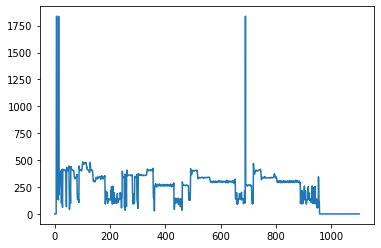

In [93]:
plt.plot(f0)

In [95]:
len(audio)/sr

25.553832199546484